# **Latar Belakang**
Saat ini berbagai jenis produk batik telah dikembangkan sehingga dapat mengikuti perkembangan jaman dan tetap dapat menarik minat masyarakat untuk menggunakan batik dalam kesehariannya. Namun, kurang paham nya masyarakat akan esensi dari motif batik tersebut dan stigma masyrakat bahwa batik cap atu tulis harga nya masih mahal menyebabkan kain batik masih kurang populer penggunaannya akibatnya industri batik di Indonesia menjadi lesu. Berdasarkan data dari APPBI industri batik Indonesia selama musim pandemi mengalami penurununan yang cukup drastis khususnya bagi UMKM dengan skala permodalan di bawah 50 juta yang hampir berhenti total, selain itu pendapatan mereka maksimal hanya mencapai 30% jika dibandingkan dengan situasi normal. Dengan adanya web ini, diharapkan dapat membantu masyarakat untuk lebih mengenal motif batik dan juga ikut melestarikan batik yang merupakan warisan budaya Indonesia.

# **1. Problem Scoping**





**What:**

Indonesia memiliki motif batik yang sangat beragam, berdasarkan penelitian yang dilakukan Bandung Fe Institute dan Sobat Budaya pada 2015 mencatat, setidaknya ada 5.849 motif batik Indonesia yang tersebar dari Aceh hingga Papua. Dengan keberagaman ini masyarakat terkadang sulit untuk mengidentifikasi motif batik yang mereka jumpai.

**Who:**

Aplikasi ini dapat digunakan oleh masyarakat umum untuk mengenali motif batik daerah baik untuk keperluan edukasi maupun bisnis.

**Where:**

Aplikasi ini bisa diakses dimana saja karena aplikasi yang kami rancang berbasis web

**Why:**

Aplikasi ini diharapkan dapat membantu masyarakat untuk lebih mengenal motif batik nusantara dan juga bisa melestarikan batik sebagai warisan budaya Indonesia.

# **2. Data Acquisition**

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import glob
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import fnmatch

import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Activation
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import random as rn
from tensorflow.keras.utils import to_categorical

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"superhero22","key":"2e206edaac9be269cd2025d19cdaaeca"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d dionisiusdh/indonesian-batik-motifs --force

 98% 256M/262M [00:02<00:00, 122MB/s]
100% 262M/262M [00:02<00:00, 130MB/s]


In [9]:
! mkdir databatik

In [10]:
! unzip indonesian-batik-motifs.zip -d databatik

Archive:  indonesian-batik-motifs.zip
  inflating: databatik/batik-bali/1.jpg  
  inflating: databatik/batik-bali/10.jpg  
  inflating: databatik/batik-bali/11.jpg  
  inflating: databatik/batik-bali/12.jpg  
  inflating: databatik/batik-bali/13.jpg  
  inflating: databatik/batik-bali/14.jpg  
  inflating: databatik/batik-bali/15.jpg  
  inflating: databatik/batik-bali/16.jpg  
  inflating: databatik/batik-bali/17.jpg  
  inflating: databatik/batik-bali/18.jpg  
  inflating: databatik/batik-bali/19.jpg  
  inflating: databatik/batik-bali/2.jpg  
  inflating: databatik/batik-bali/20.jpg  
  inflating: databatik/batik-bali/21.jpg  
  inflating: databatik/batik-bali/22.jpg  
  inflating: databatik/batik-bali/23.jpg  
  inflating: databatik/batik-bali/24.jpg  
  inflating: databatik/batik-bali/25.jpg  
  inflating: databatik/batik-bali/26.jpg  
  inflating: databatik/batik-bali/27.jpg  
  inflating: databatik/batik-bali/28.jpg  
  inflating: databatik/batik-bali/29.jpg  
  inflating: datab

# **3. Data Exploration**

In [11]:
Z=[]

# Mengubah piksel gambar agar lebih kecil
image_size = 150

#menyimpan dataset ke dalam variabel
batik_bali_DIR='/content/databatik/batik-bali'
batik_garutan_DIR='/content/databatik/batik-garutan'
batik_sogan_DIR='/content/databatik/batik-sogan'
batik_lasem_DIR='/content/databatik/batik-lasem'
batik_kawung_DIR='/content/databatik/batik-kawung'

In [12]:
def assign_label(img,batik_type):
    return batik_type

In [13]:
X=[]

def make_train_data(batik_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        if fnmatch.fnmatch(img, '*.jpg'):
            label=assign_label(img,batik_type)
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (image_size, image_size))

            X.append(np.array(img))
            Z.append(str(label))

In [14]:
make_train_data('batik-bali',batik_bali_DIR)
print(len(X))

100%|██████████| 50/50 [00:01<00:00, 33.90it/s]

50


In [15]:
make_train_data('batik-garutan',batik_garutan_DIR)
print(len(X))

100%|██████████| 50/50 [00:00<00:00, 62.45it/s]

100


In [16]:
make_train_data('batik-sogan',batik_sogan_DIR)
print(len(X))

100%|██████████| 50/50 [00:00<00:00, 51.75it/s]

150


In [17]:
make_train_data('batik-lasem',batik_lasem_DIR)
print(len(X))

100%|██████████| 50/50 [00:00<00:00, 68.71it/s]

200


In [18]:
make_train_data('batik-kawung',batik_kawung_DIR)
print(len(X))

100%|██████████| 45/45 [00:00<00:00, 45.74it/s]

245


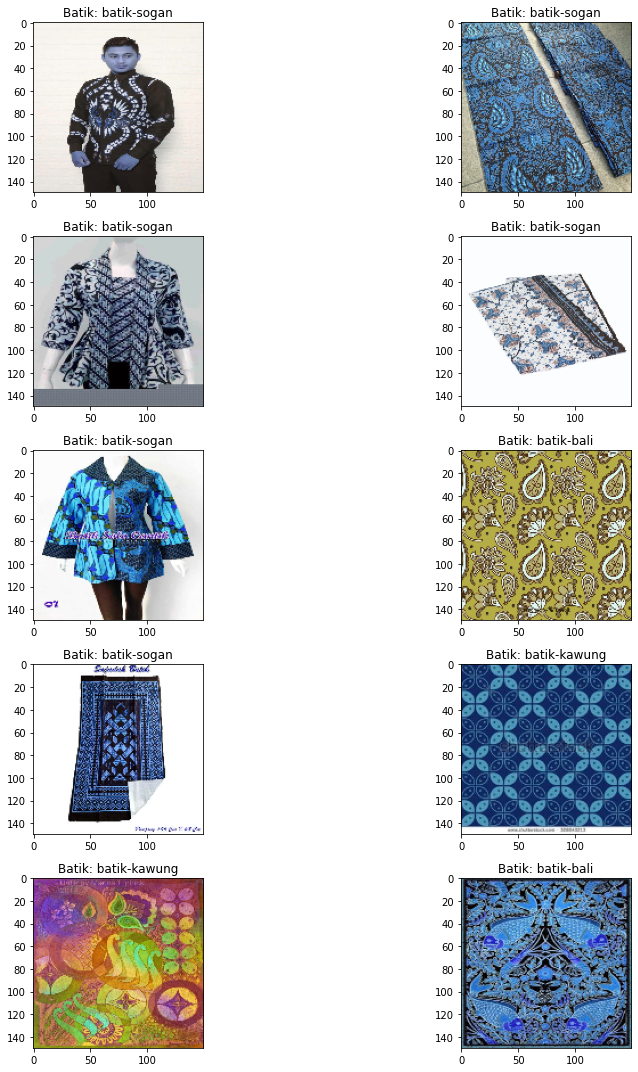

In [19]:
# menampilkan gambar batik secara acak

fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Batik: '+Z[l])
        
plt.tight_layout()

In [20]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# **4. Modeling**

In [22]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [23]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2, 
        height_shift_range=0.2,  
        horizontal_flip=True, 
        vertical_flip=False)  

datagen.fit(x_train)

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# **6. Evaluation**

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [26]:
batch_size=128
epochs=300

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [27]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/300
1/1 [==============================] - 15s 15s/step - loss: 0.6860 - accuracy: 0.2422 - val_loss: 0.6564 - val_accuracy: 0.1892
Epoch 2/300
1/1 [==============================] - 1s 830ms/step - loss: 0.6158 - accuracy: 0.1860 - val_loss: 0.5367 - val_accuracy: 0.1486
Epoch 3/300
1/1 [==============================] - 1s 713ms/step - loss: 0.5286 - accuracy: 0.2109 - val_loss: 0.5530 - val_accuracy: 0.1486
Epoch 4/300
1/1 [==============================] - 1s 709ms/step - loss: 0.5487 - accuracy: 0.1953 - val_loss: 0.5320 - val_accuracy: 0.1486
Epoch 5/300
1/1 [==============================] - 1s 717ms/step - loss: 0.5297 - accuracy: 0.2031 - val_loss: 0.5192 - val_accuracy: 0.1892
Epoch 6/300
1/1 [==============================] - 0s 318ms/step - loss: 0.4993 - accuracy: 0.3023 - val_loss: 0.5431 - val_accuracy: 0.2027
Epoch 7/300
1/1 [==============================] - 1s 763ms/step - loss: 0.5219 - accuracy: 0.1797 - val_loss: 0.5257 - val_accuracy: 0.2162
Epoch 8/300
1/

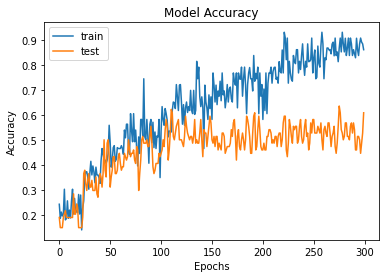

In [28]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [29]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [30]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

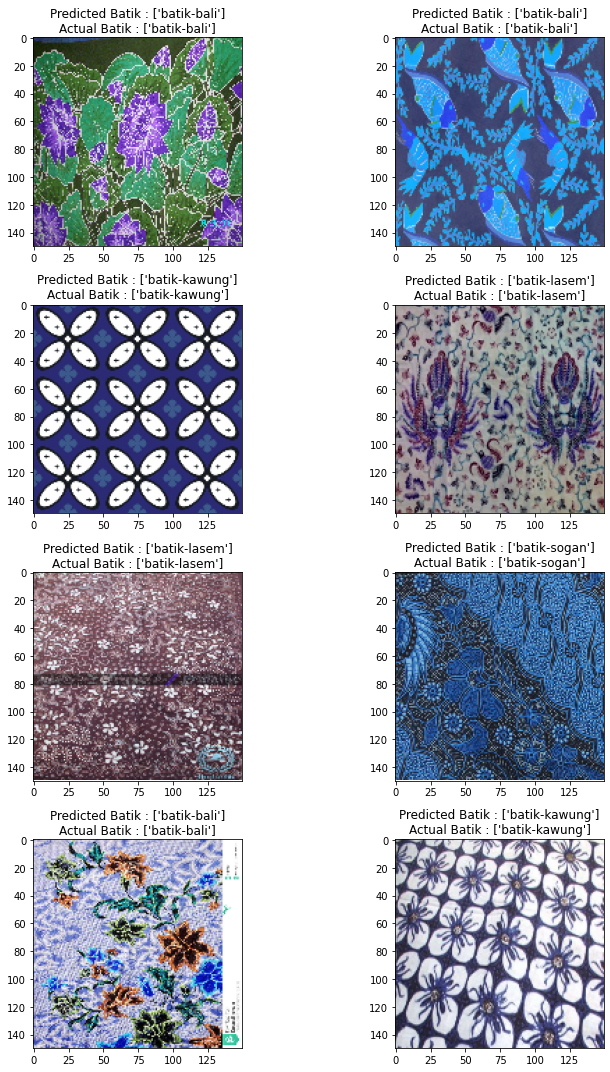

In [31]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Batik : "
                          +str(le.inverse_transform([pred_digits[prop_class[count]]]))
                          +"\n"+"Actual Batik : "
                          +str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

In [32]:
model.save("my_h5_model.h5")
model.save("my_hdf5_model.hdf5")